In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Datasets/homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
6,2732,4,135.0
11,2785,4,140.0
7,3300,4,155.0
12,1000,2,38.0
4,1200,2,51.0


In [3]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [4]:
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [5]:
number_of_features = scaled_X.shape[1]

In [6]:
w = np.ones(shape=(number_of_features))

In [7]:
np.random.permutation(20)

array([ 8,  4, 10, 12, 13,  9,  0, 18,  2, 17,  6,  7,  3,  5,  1, 15, 19,
       11, 16, 14])

In [8]:
def mini_batch_gradient_descent(X, y_true, epochs,batch_size, learning_rate = 0.01):

    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    if batch_size > total_samples:
        batch_size = total_samples
    cost_list = []
    epoch_list = []
    for i in range(epochs):
        random_indices = np.random.permutation(total_samples)
        X_number = X[random_indices]
        y_number = y_true[random_indices]
        for j in range(0,total_samples,batch_size):
            Xj = X_number[j:j+batch_size]
            yj = y_number[j:j+batch_size]
            y_predicted = np.dot(Xj, w) + b
            w_grad = -(2/len(Xj))*(np.dot(Xj.T,(yj-y_predicted)))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost = np.mean(np.square(yj-y_predicted))
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list
w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    scaled_X,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)
w, b, cost


(array([0.71006056, 0.67811464]), -0.2334238828687081, 0.003459963717498306)

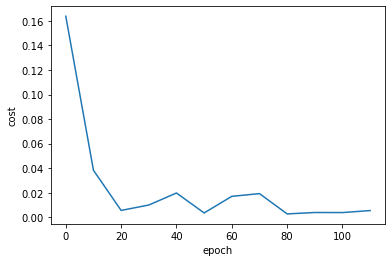

In [9]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [10]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

128.64506100458516

In [11]:
predict(1521,3,w,b)

70.09283968770265

In [12]:
predict(1000,2,w,b)

29.985053546465945